## Linear Regression with symbol

This sample constructs a simple linear regression model with symbol.

To caculate the weights and bias of the following formula:

x1*weight1 + x2*weight2 + bias < 0   y=>0
x1*weight1 + x2*weight2 + bias >= 0   y=>1


In [144]:
import mxnet as mx
import numpy as np

#### Generate sample data

In [145]:
b = -2
w1 = 3
w2 = 5

sample_number = 10000

x1 = np.random.rand(sample_number)
x2 = np.random.rand(sample_number)
noise = np.random.rand(sample_number)

x0_array = mx.nd.ones((sample_number,))
x1_array = mx.nd.array(x1)-0.5
x2_array = mx.nd.array(x2)-0.5
noise_array = mx.nd.array(noise)-0.5

x_data = mx.nd.concat(x0_array, x1_array, x2_array, dim=0).reshape((3,sample_number)).T
y_data = x1_array*w1 + x2_array*w2 + b + noise_array*0.01

y_label = y_data >= 0

x_data[0:3].asnumpy()

x_data.shape


(10000L, 3L)

In [146]:
y_label[0:3].asnumpy()

array([ 0.,  0.,  0.], dtype=float32)

#### Construct the model

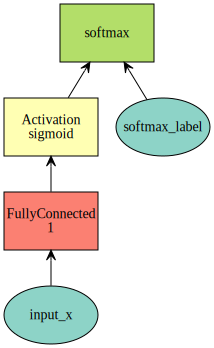

In [147]:

input_x = mx.sym.Variable("input_x")
weight_x = mx.sym.Variable("weight_x")

fc = mx.sym.FullyConnected(data=input_x, num_hidden=1, name="fc1", no_bias=True)

sigmoid = mx.sym.Activation(data=fc, act_type="sigmoid", name="sigmoid1")

softmax = mx.sym.Softmax(data=sigmoid, name="softmax")

mx.viz.plot_network(symbol=softmax)

In [148]:
batch_size = 25

train_iter = mx.io.NDArrayIter(data={'input_x':x_data[1:700]},label={'softmax_label':y_label[1:700]},batch_size=batch_size)
eval_iter = mx.io.NDArrayIter(data={'input_x':x_data[701:1000]},label={'softmax_label':y_label[701:1000]},batch_size=batch_size)


model = mx.mod.Module(softmax, data_names=["input_x"], label_names=["softmax_label"])

model.bind(data_shapes=train_iter.provide_data,
         label_shapes=train_iter.provide_label)  # create memory by given input shapes
model.init_params() 

#### Train the model



In [149]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

#train_iter = mx.io.NDArrayIter(x_data)
#train_iter = mx.io.NDArrayIter(x_data, y_label, 25, shuffle=True,label_name='softmax_label')


model.fit(train_iter, eval_iter, num_epoch=100, batch_end_callback = mx.callback.Speedometer(batch_size, 20))

INFO:root:Epoch[0] Batch [20]	Speed: 68860.68 samples/sec	Train-accuracy=0.845714
INFO:root:Epoch[0] Train-accuracy=0.862857
INFO:root:Epoch[0] Time cost=0.012
INFO:root:Epoch[0] Validation-accuracy=0.893333
INFO:root:Epoch[1] Batch [20]	Speed: 64292.34 samples/sec	Train-accuracy=0.845714
INFO:root:Epoch[1] Train-accuracy=0.862857
INFO:root:Epoch[1] Time cost=0.013
INFO:root:Epoch[1] Validation-accuracy=0.893333
INFO:root:Epoch[2] Batch [20]	Speed: 64109.56 samples/sec	Train-accuracy=0.845714
INFO:root:Epoch[2] Train-accuracy=0.862857
INFO:root:Epoch[2] Time cost=0.013
INFO:root:Epoch[2] Validation-accuracy=0.893333
INFO:root:Epoch[3] Batch [20]	Speed: 63036.22 samples/sec	Train-accuracy=0.845714
INFO:root:Epoch[3] Train-accuracy=0.862857
INFO:root:Epoch[3] Time cost=0.013
INFO:root:Epoch[3] Validation-accuracy=0.893333
INFO:root:Epoch[4] Batch [20]	Speed: 68344.53 samples/sec	Train-accuracy=0.845714
INFO:root:Epoch[4] Train-accuracy=0.862857
INFO:root:Epoch[4] Time cost=0.012
INFO:roo